# Submission

* The notebook that you submit **must** run (without *any* errors), and create a `submission.csv` file, in the required format.

* This notebook should serve as a template to your final notebook submission.

In [ ]:
"""
TEAM MEAMBERS-
Suraj Rao 
Srinivas Ramakrishnan 
Vishal Nagaraj 

Under Prof K S Srinivas

SUMMARY OF OUR LOGIC -
-using a arimax model to predict closing values 
- using short term and long term moving averages to perdict strategy(explained in detail later)

NOMENCLATURE-
train_data,test_data- this is the test,train split made by spliting the "train" data given.


"""

'\nTEAM MEAMBERS-\nSuraj Rao PES1UG21CS647\nSrinivas Ramakrishnan PES1UG21CS624\nVishal Nagaraj PES1UG21CS715\n\nUnder Prof K S Srinivas\n\nSUMMARY OF OUR LOGIC -\n-using a arimax model to predict closing values \n- using short term and long term moving averages to perdict strategy(explained in detail later)\n\nNOMENCLATURE-\ntrain_data,test_data- this is the test,train split made by spliting the "train" data given.\n\n\n'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from statsmodels.tsa.arima_model import ARMA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


**High-level overview of the data **

In [3]:
df_train = pd.read_csv('/kaggle/input/ue21cs342aa2/train.csv')
df_test = pd.read_csv('/kaggle/input/ue21cs342aa2/test.csv')
print(df_train.columns)
print(df_train.dtypes)
print(df_train.shape)
df_train.head()

Index(['id', 'Date', 'Open', 'Close', 'Volume', 'Strategy'], dtype='object')
id            int64
Date         object
Open        float64
Close       float64
Volume        int64
Strategy     object
dtype: object
(300, 6)


,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


In [4]:
print(df_test.columns)
print(df_test.dtypes)
print(df_test.shape)
df_test.head()

Index(['id', 'Date', 'Open', 'Volume'], dtype='object')
id          int64
Date       object
Open      float64
Volume      int64
dtype: object
(100, 4)


,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400


In [5]:
print("***Checking for any null data:")
print(df_train.isnull())
print("***Checking for any na data:")
print(df_train.isna())

***Checking for any null data:
        id   Date   Open  Close  Volume  Strategy
0    False  False  False  False   False     False
1    False  False  False  False   False     False
2    False  False  False  False   False     False
3    False  False  False  False   False     False
4    False  False  False  False   False     False
..     ...    ...    ...    ...     ...       ...
295  False  False  False  False   False     False
296  False  False  False  False   False     False
297  False  False  False  False   False     False
298  False  False  False  False   False     False
299  False  False  False  False   False     False

[300 rows x 6 columns]
***Checking for any na data:
        id   Date   Open  Close  Volume  Strategy
0    False  False  False  False   False     False
1    False  False  False  False   False     False
2    False  False  False  False   False     False
3    False  False  False  False   False     False
4    False  False  False  False   False     False
..     ...    ..

In [6]:
#checking for zero volume in data 
v = df_train['Volume'].value_counts()
print(v.get(0))

None


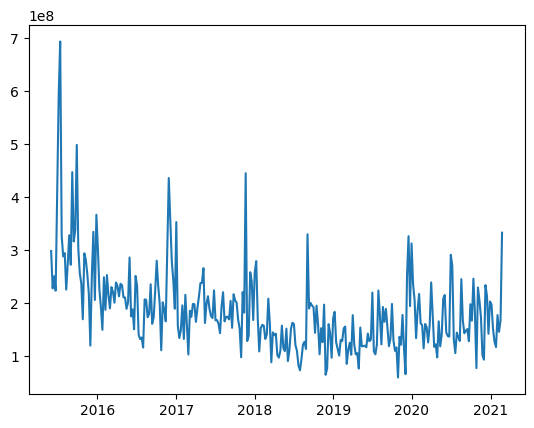

In [7]:
dates = pd.to_datetime(df_train['Date'])

plt.plot(dates, df_train['Volume'])
plt.show()

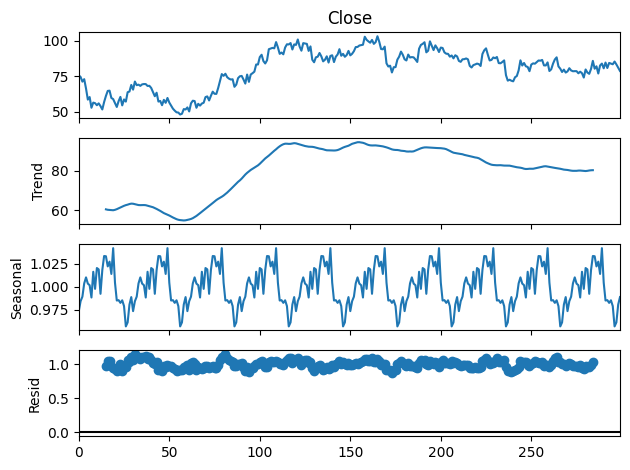

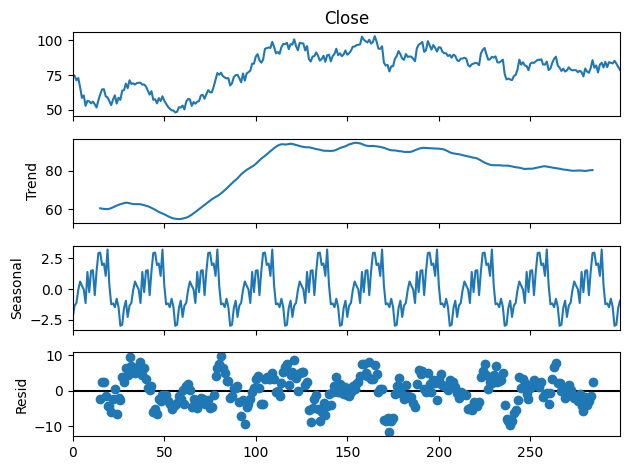

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
mul_model = seasonal_decompose(df_train['Close'], model='multiplicative', period=30)
mul_model.plot()
plt.show()
add_model = seasonal_decompose(df_train['Close'], model='additive', period=30)
add_model.plot()
plt.show()

In [9]:
# prices are not stationary 

`index_col` helps you to retain the index as provided in the dataset.

In [10]:
train = pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv", index_col = 0)
test = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv", index_col = 0)

In [11]:

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
train_data=train.iloc[:200].copy()
test_data=train.iloc[200:].copy()

print(train_data.shape[0])
print(test_data.shape[0])

200
100


# Your model creation, training and inferencing code, along with suitable analysis and reasoning!

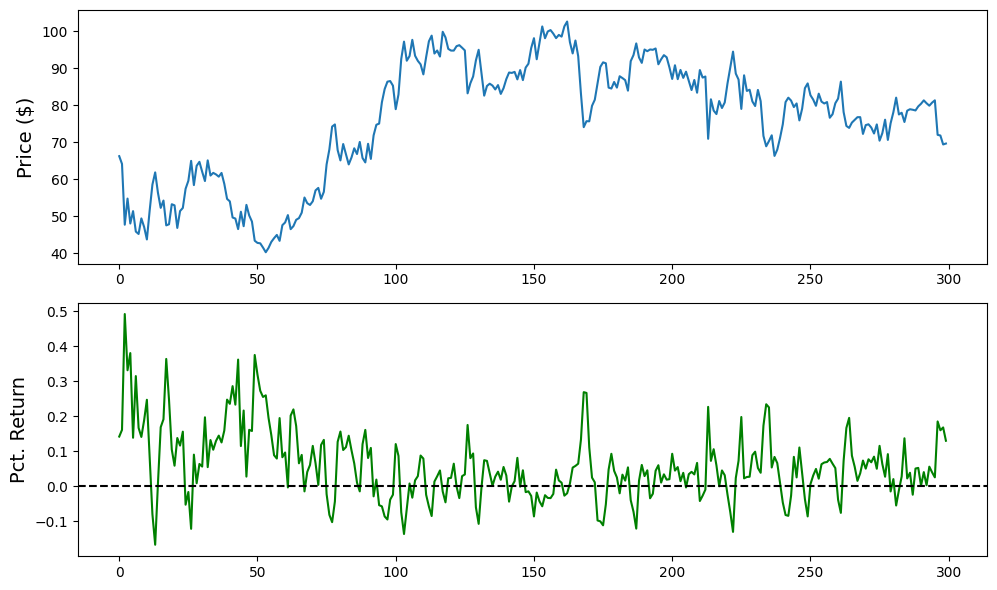

In [12]:
"""
the feature we have engineered is called returns which is the diffrence of opening and closing prices for each day.
this had much more predictability than other features such as diffrencing close values.
this also makes the data more statiorany compared to just prices. we still might have to use diffrencing 
this gave satisfactory pacf and acf plots which we have shown below 
"""
train["returns"]=(train["Close"]-train["Open"])/train["Open"]

test_data["returns"]=(test_data["Close"]-test_data["Open"])/test_data["Open"]
train_data["returns"]=(train_data["Close"]-train_data["Open"])/train_data["Open"]

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(train["Open"])
plt.ylabel('Price ($)', fontsize=14)
plt.subplot(2,1,2)
plt.plot(train["returns"], color='g')
plt.ylabel('Pct. Return', fontsize=14)
plt.axhline(0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['returns'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.7971231326236397
n_lags: 9
p-value: 0.0029368866378594173
Critial Values:
   1%, -3.453102162983312
Critial Values:
   5%, -2.871558538275452
Critial Values:
   10%, -2.5721082282996433


In [14]:
'''For 5% significance, p-value is lesser than the critical value. We reject the null hypothesis, hence the returns are stationary'''

'For 5% significance, p-value is lesser than the critical value. We reject the null hypothesis, hence the returns are stationary'

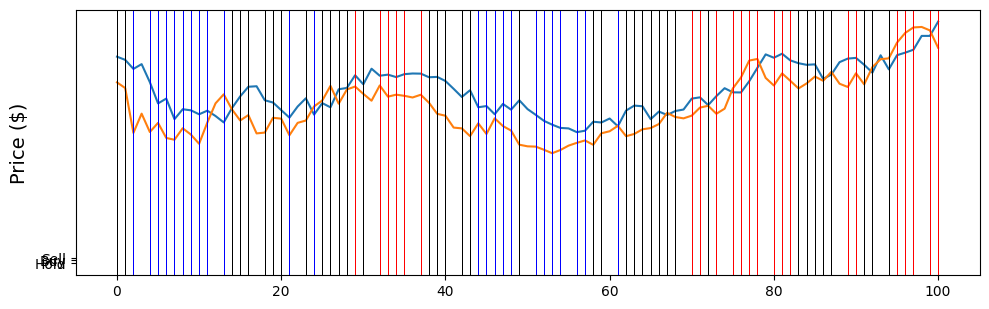

In [15]:
"""here we are just plotting the opening and closing prices along with the strategy used at each point 
to visualise what is happening
blue line indicates buy
red line indicates sell 
and black line indicates hold """

plt.figure(figsize=(10, 6))
start_row=0
end_row=100

# Plot the stock price in the first subplot
plt.subplot(2, 1, 1)
plt.plot(train["Close"].iloc[start_row:end_row + 1])
plt.plot(train["Open"].iloc[start_row:end_row + 1])

plt.ylabel('Price ($)', fontsize=14)

# Plot the lines representing different categories on the same subplot
colors = ["red" if category == "Sell" else "blue" if category=="Buy" else "black" for category in train["Strategy"]]


for i, category in enumerate(train["Strategy"].iloc[start_row:end_row + 1]):
    plt.hlines(category, xmin=i, xmax=i+0.1, colors=colors[i], lw=500, label=category)

# Set the legend
#plt.legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()



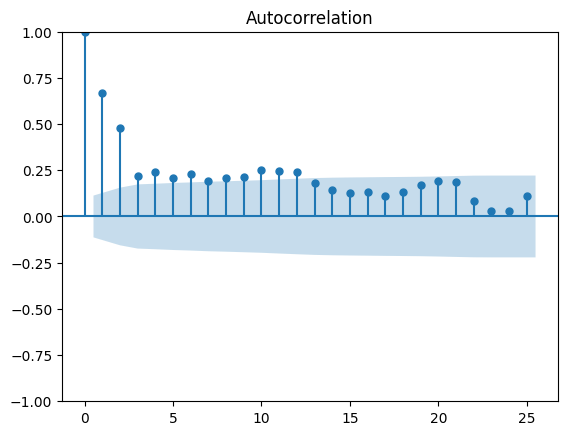

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train["returns"])
plt.show()

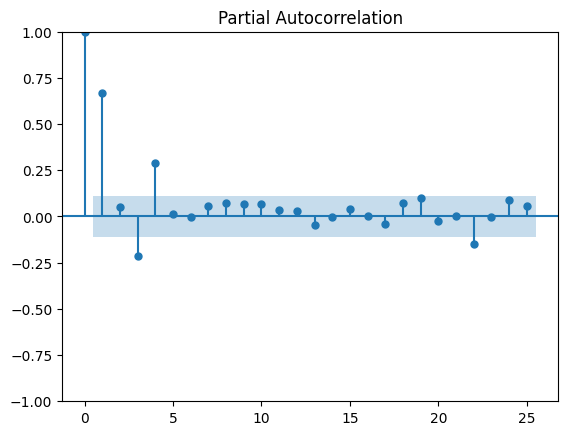

In [17]:
plot_pacf(train["returns"])
plt.show()

In [18]:
"""we use pcaf plot to find p the auto regressive componet
we use the acf plot to find q the moving average  componet
and since the returns are stationary we can use d value as zero """

'we use pcaf plot to find p the auto regressive componet\nwe use the acf plot to find q the moving average  componet\nand since the returns are stationary we can use d value as zero '

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


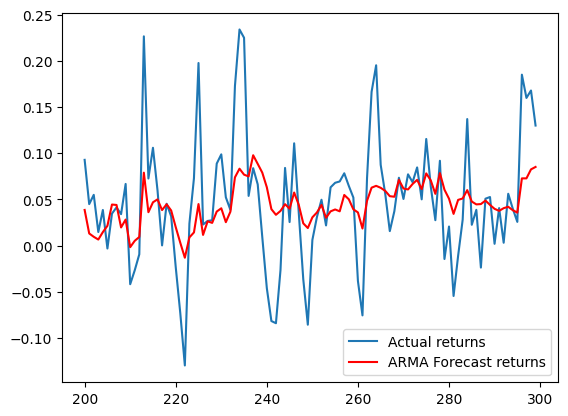

In [19]:
"""we create a arimax model with appropriate p,q and d values for the returns 
this graph is only a forecast of the returns and not the closing price
we use exogenous varaible of opening values 
"""
start_date = test_data.index[0]
end_date = test_data.index[-1]
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
model = sm.tsa.ARIMA(train_data["returns"], order=(2, 0, 13),exog=train_data[["Volume","Open"]])  #(12, 1, 0)
results = model.fit()
forecast1 = results.predict(start=start_date, end=end_date, dynamic=True,exog=test_data[["Volume","Open"]])
plt.plot(test_data["returns"], label='Actual returns')
plt.plot(forecast1, color='red', label='ARMA Forecast returns')
plt.legend()
plt.show()

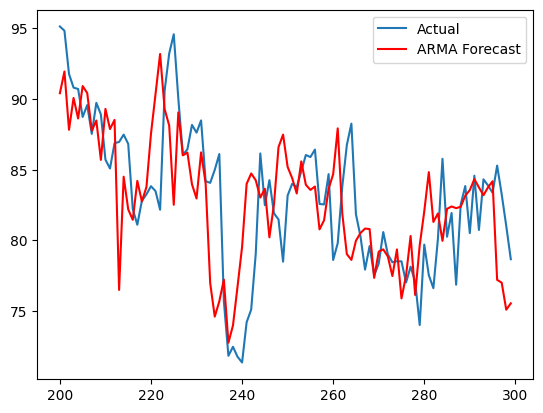

In [20]:
"""this is a plot of the actual closing values vs the true closing values 
we get the predicted values for close value by multiplying returns(which is a percentage) with the opening value and adding it with the same"""
plt.plot(test_data["Close"], label='Actual')
plt.plot(test_data["Open"] + (forecast1 * test_data["Open"]), color='red', label='ARMA Forecast')
#plt.plot(test_data["Open"] , color='green', label='true opening values')

plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


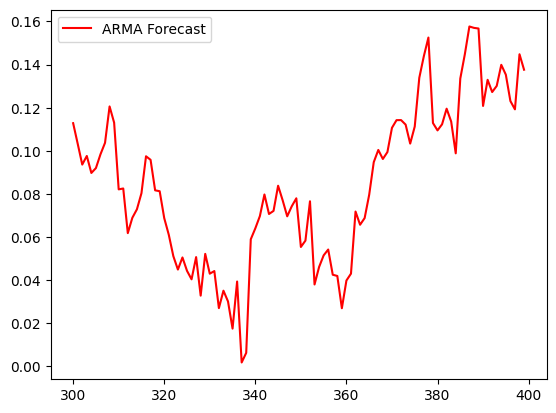

,Date,Open,Volume,Close
id,,,,
0,2021-03-01,72.708331,205897600,80.910260
1,2021-03-08,73.310886,214095600,80.881789
2,2021-03-15,70.610119,151601700,77.218640
3,2021-03-22,70.256017,193982500,77.112486
4,2021-03-29,68.258324,220238400,74.381119
5,2021-04-05,69.625390,252489500,76.028292
6,2021-04-12,72.046746,178234600,79.133041
7,2021-04-19,71.426418,194482300,78.832339
8,2021-04-26,70.060497,235236100,78.508461


In [21]:
"""now we predict for the true test data provided to us and plot it. the code is similar what we did previously """
#predicting for test data
start_date = test.index[0]+train.shape[0]
end_date = test.index[-1]+train.shape[0]
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
model = sm.tsa.ARIMA(train["returns"], order=(2, 0, 13),exog=train[["Volume","Open"]])
results = model.fit()
forecast = results.predict(start=start_date, end=end_date, dynamic=True,exog=test[["Volume","Open"]])
#plt.plot(train["returns"], label='Actual')
plt.plot(forecast, color='red', label='ARMA Forecast')
plt.legend()
plt.show()

import pandas as pd

forecast = forecast.reset_index(drop=True)
test["Close"] = test["Open"] + (forecast * test["Open"])
test.head(n=10)


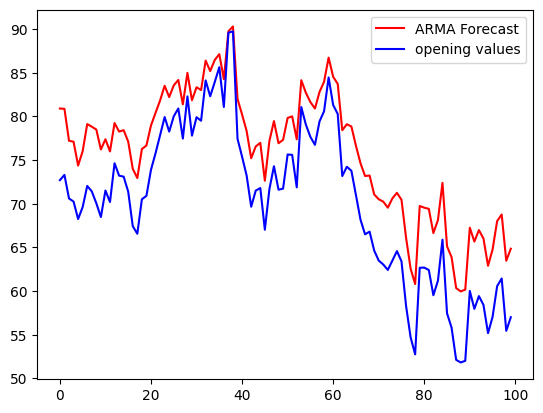

In [22]:
"""just a visualisation of opening and predicted closing values for the test part of the dataset """
plt.plot(test["Close"], color='red', label='ARMA Forecast')
plt.plot(test["Open"], color='blue', label='opening values')

plt.legend()
plt.show()

5 29 4   accuracy= 71.0


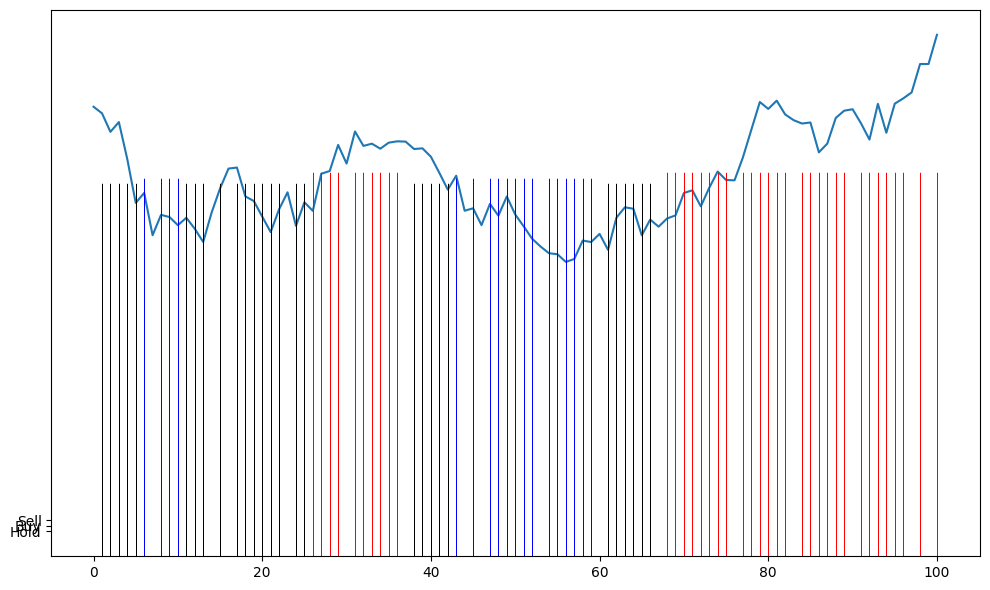

         Date       Open      Close     Volume Strategy   returns        sma  \
id                                                                             
0  2015-06-01  66.208486  75.609978  298506300     Hold  0.141998  66.208486   
1  2015-06-08  64.116235  74.443331  227974800     Hold  0.161068  65.162361   
2  2015-06-15  47.701942  71.140831  250670900      Buy  0.491361  59.342221   
3  2015-06-22  54.754816  72.881344  223614300     Hold  0.331049  58.195370   
4  2015-06-29  48.031899  66.284718  406814900      Buy  0.380015  56.162676   

          lma    ns  
id                   
0   66.208486  Hold  
1   65.162361  Hold  
2   59.342221  Hold  
3   58.195370  Hold  
4   56.162676  Hold  


In [23]:
""" 
Explanation of Our Distinctive Strategy Selection Algorithm:
We are engaged in the process of formulating predictive strategies by utilizing both short-term and long-term moving averages of stock prices.
Fundamentally, if the short-term average surpasses the long-term average (indicating that we are at the peak of the price trend, 
with prices poised to decline), we opt for a selling strategy. Conversely, if the short-term average falls below the long-term average
(indicating that we are at the trough of the price trend, with prices poised to rise), we choose to employ a buying strategy.
we have eased this constraint to include the "hold" strategy by using a threshold value  .we initally set all strategy columns to hold and then apply the above constraints.
we belive that this part of predicting strategy is unique.
i have intitialised them here without explaination but subsequent code blocks show how we have found it. 
the graph below shows the strategy predicted along with the price of the stock.
we have also experimented with other flavours of this model such as using exponential weighted means or using the predicted close values
(they are provided as comments but are not used since they proved to be inferior in our tests)
furthermore if we used the predicted close values, the error in its prediction might 
propogate  and may be ineffective on the private test cases

blue line indicates buy
red line indicates sell 
and black line indicates hold 
#ns-new stratagey that we predict 
#lma- long moving average 
#sma-short moving average
 """
short_window=5
long_window=29
thresh=4
train['sma'] = train['Open'].rolling(window=short_window, min_periods=1).mean()
train['lma'] = train['Open'].rolling(window=long_window, min_periods=1).mean()
#train['sma'] = (train["Open"] + (forecast1 * train["Open"])).rolling(window=short_window, min_periods=1).mean()
#train['lma'] = (train["Open"] + (forecast1 * train["Open"])).rolling(window=long_window, min_periods=1).mean()
#train['sma'] = train['Open'].ewm(span=short_window, adjust=False).mean()
#train['lma'] = train['Open'].ewm(span=long_window, adjust=False).mean()
train['ns']="Hold"
train.loc[train['sma'] > train['lma']+thresh, 'ns'] = 'Sell' #ns-new stratagey #lma- long moving average #sma-short moving average 
train.loc[train['sma'] < train['lma']-thresh, 'ns'] = 'Buy'
accuracy = accuracy_score(train['Strategy'].tail(200), train['ns'].tail(200)) * 100
print(short_window,long_window,thresh,"  accuracy=",accuracy)

plt.figure(figsize=(10, 6))
start_row=0
end_row=100
#train['ns']="Buy"

colors = ["red" if category == "Sell" else "blue" if category=="Buy" else "black" for category in train["ns"]]

plt.plot(train["Close"].iloc[start_row:end_row + 1])
for i, category in enumerate(train["ns"].iloc[start_row:end_row + 1]):
    plt.hlines(category, xmin=i, xmax=i+0.1, colors=colors[i], lw=500, label=category)
plt.tight_layout()

# Show the plot
plt.show()
print(train.head())




In [24]:
"""this is the code to train our model . we iterate through all possible combiations of threshold long and short window.
this is feasable because we have only three parameters"""
maxx=0
for short_window in range(1,20,1):
    for long_window in range(1,50,1):
        #for thresh in np.arange(0.0, 5.1, 0.3):
        for thresh in range(0,3,1):

            #train['sma'] = (train["Open"] + (forecast1 * train["Open"])).rolling(window=short_window, min_periods=1).mean()
            #train['lma'] = (train["Open"] + (forecast1 * train["Open"])).rolling(window=long_window, min_periods=1).mean()
            #train['sma'] = train['Open'].ewm(span=short_window, adjust=False).mean()
            #train['lma'] = train['Open'].ewm(span=long_window, adjust=False).mean()
            train['sma'] = train['Open'].rolling(window=short_window, min_periods=1).mean()
            train['lma'] = train['Open'].rolling(window=long_window, min_periods=1).mean()
            train['ns']="Hold"
            train.loc[train['sma'] > train['lma']+thresh, 'ns'] = 'Sell' #ns-new stratagey #lma- long moving average #sma-short moving average 
            train.loc[train['sma'] < train['lma']-thresh, 'ns'] = 'Buy'
            accuracy = accuracy_score(train['Strategy'].tail(200), train['ns'].tail(200)) * 100

            if(accuracy>maxx):
                maxx=accuracy
                sw=short_window
                lw=long_window
                t=thresh
            #print(short_window,long_window,thresh,"  accuracy=",accuracy)
print(lw,sw,t,"  ",maxx)

21 10 2    67.5


In [25]:
test.head(n=10)

,Date,Open,Volume,Close
id,,,,
0,2021-03-01,72.708331,205897600,80.910260
1,2021-03-08,73.310886,214095600,80.881789
2,2021-03-15,70.610119,151601700,77.218640
3,2021-03-22,70.256017,193982500,77.112486
4,2021-03-29,68.258324,220238400,74.381119
5,2021-04-05,69.625390,252489500,76.028292
6,2021-04-12,72.046746,178234600,79.133041
7,2021-04-19,71.426418,194482300,78.832339
8,2021-04-26,70.060497,235236100,78.508461


In [26]:
# #feature engineered 
# #rolling(window=long_window, min_periods=1).mean()
# maxx=0
# for short_window in range(1,20,1):
#     for long_window in range(1,50,1):
#         for thresh in np.arange(0.0, 5.1, 0.1):
#         #for thresh in range(0, 10, 1):
#         #thresh=2
#             train['sma'] = train['Open'].rolling(window=short_window, min_periods=1).mean()
#             train['lma'] = train['Open'].rolling(window=long_window, min_periods=1).mean()
#             train['ns']="Hold"
#             train.loc[train['sma'] > train['lma']+thresh, 'ns'] = 'Sell' #ns-new stratagey #lma- long moving average #sma-short moving average 
#             train.loc[train['sma'] < train['lma']-thresh, 'ns'] = 'Buy'
#             accuracy = accuracy_score(train['Strategy'].tail(200), train['ns'].tail(200)) * 100
#             if(accuracy>maxx):
#                 maxx=accuracy
#                 sw=short_window
#                 lw=long_window
#                 t=thresh
#             #print(short_window,long_window,thresh,"  accuracy=",accuracy)
# print(lw,sw,t,"  ",maxx)

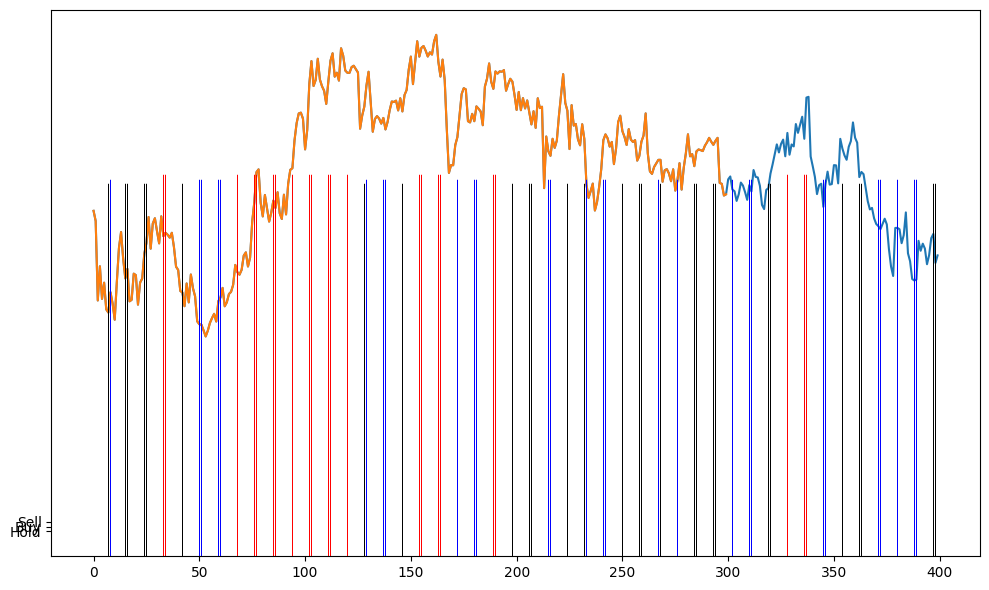

In [27]:
"""we use the best values for our model from the training loops and use them to predict for the true test data
we create a new datafram called test new by combining the train and test data becaause we would not be able to calculate moving averages 
for the inital data of the test dataset wothout any prior value
graph is similar to what we have been doing above """
# these three parameters (short term window, long term window and threshold )
#are trained using three for loops that find the best values for each parameter
#ns-new stratagey used from predicting 
#lma- long moving average
#sma-short moving average
short_window=5
long_window=29
t=4 #threshold 
testnew = pd.concat([train, test], ignore_index=True)
testnew['sma'] = testnew['Open'].rolling(window=short_window, min_periods=1).mean()
testnew['lma'] = testnew['Open'].rolling(window=long_window, min_periods=1).mean()
testnew["ns"]="Hold"
testnew.loc[testnew['sma'] > testnew['lma']+t, 'ns'] = 'Sell' 
testnew.loc[testnew['sma'] < testnew['lma']-t, 'ns'] = 'Buy'


plt.figure(figsize=(10, 6))
start_row=0
end_row=400
colors = ["red" if category == "Sell" else "blue" if category=="Buy" else "black" for category in testnew["ns"]]

plt.plot(testnew["Open"].iloc[start_row:end_row + 1])
plt.plot(train["Open"].iloc[start_row:end_row + 1])

for i, category in enumerate(testnew["ns"].iloc[start_row:end_row + 1]):
    plt.hlines(category, xmin=i, xmax=i+0.1, colors=colors[i], lw=500, label=category)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
testnew["ns"]

0      Hold
1      Hold
2      Hold
3      Hold
4      Hold
       ... 
395    Hold
396    Hold
397    Hold
398    Hold
399    Hold
Name: ns, Length: 400, dtype: object

In [29]:
submission = pd.DataFrame()
submission["Date"] = test["Date"]

In [30]:
#sample_submission = pd.read_csv('/kaggle/input/ue21cs342aa2/sample_submission.csv', index_col = 0)

In [31]:
testnew['ns'].iloc[-100:]

300     Buy
301     Buy
302     Buy
303     Buy
304     Buy
       ... 
395    Hold
396    Hold
397    Hold
398    Hold
399    Hold
Name: ns, Length: 100, dtype: object

In [32]:
submission["Close"] = test["Close"]
submission["Strategy"] = testnew['ns'].iloc[-100:].reset_index(drop=True)

### In the cell above, we have just provided an example of how to create your submission DataFrame. Please make sure to use **your own forecasts and predictions**, in place of `sample_submission["Close"]` and `sample_submission["Strategy"]`

In [33]:
submission

,Date,Close,Strategy
id,,,
0,2021-03-01,80.910260,Buy
1,2021-03-08,80.881789,Buy
2,2021-03-15,77.218640,Buy
3,2021-03-22,77.112486,Buy
4,2021-03-29,74.381119,Buy
...,...,...,...
95,2022-12-26,64.768175,Hold
96,2023-01-02,68.025230,Hold
97,2023-01-09,68.772947,Hold


In [34]:
submission.to_csv('submission.csv', index=True)